#Importing Mahalanobis distance matrix from Matlab, to use for MDS

In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

#distMat is received from mahalanobisDist.m in the Matlab folder
distMat = pd.read_excel("/content/drive/MyDrive/UU_Thesis/distMat.xlsx", header=None)

In [2]:
distMat.set_index(distMat.columns[0], inplace=True)

In [16]:
mds = MDS(dissimilarity='precomputed', random_state=0)

In [17]:
mahalScaled = mds.fit_transform(distMat)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [11]:
for index, value in enumerate(mahalScaled):
    print(f"{index}\t{value}")

#Mind that the index start at 0, but images at 1. So coörds [0.36414693 0.33208063] are for image 1

0	[0.04805681 0.38397226]
1	[0.10746354 0.02405701]
2	[-0.13316045  0.19403815]
3	[-0.09658021  0.4766985 ]
4	[ 0.40036049 -0.10230234]
5	[0.32271257 0.0373885 ]
6	[0.03946485 0.39462259]
7	[-0.45657306 -0.39248431]
8	[-0.364491   0.2355735]
9	[0.20743792 0.33033337]
10	[0.38266786 0.34070043]
11	[-0.04318057  0.33941575]
12	[-0.37708528  0.08131372]
13	[-0.26429278  0.326599  ]
14	[-0.06551274 -0.10058382]
15	[-0.24947578  0.27988733]
16	[-0.11872096  0.11629009]
17	[-0.4271956   0.05311298]
18	[0.11999572 0.23460449]
19	[0.34938163 0.16842039]
20	[-0.1993577   0.00580853]
21	[ 0.16301276 -0.61023672]
22	[0.15528097 0.23671432]
23	[-0.36579281 -0.51705316]
24	[-0.24466417 -0.1122046 ]
25	[-0.03940167  0.00149489]
26	[ 0.54761102 -0.4506741 ]
27	[-0.36039835 -0.29271297]
28	[ 0.0796983  -0.24868238]
29	[-0.09299089 -0.3278472 ]
30	[-0.37256353 -0.3634221 ]
31	[ 0.07527462 -0.40105797]
32	[-0.39899165 -0.11345221]
33	[ 0.33710131 -0.42355369]
34	[ 0.37365338 -0.39159714]
35	[ 0.58679464

Plot of coördinates

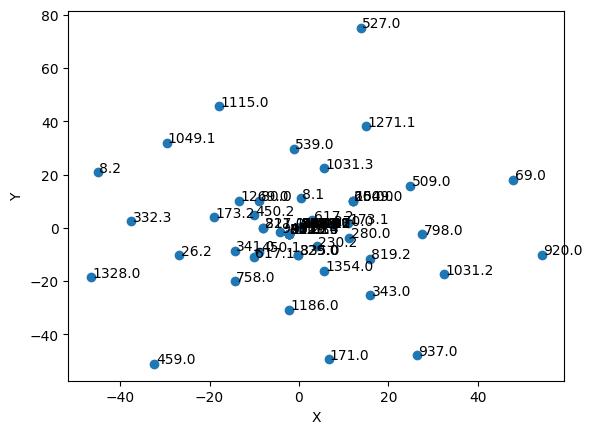

In [18]:
import matplotlib.pyplot as plt

#create scatterplot
plt.scatter(mahalScaled[:,0], mahalScaled[:,1])

#add axis labels
plt.xlabel('X')
plt.ylabel('Y')

#add lables to each point
for i, txt in enumerate(distMat.index):
    plt.annotate(txt, (mahalScaled[:,0][i]+.3, mahalScaled[:,1][i]))

#display scatterplot
plt.show()

Visualise coördinates with corresponding image

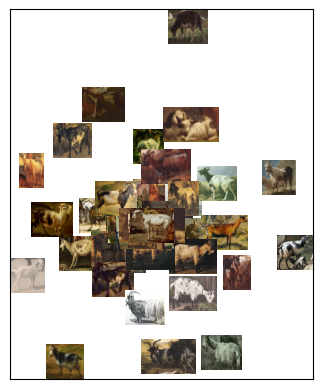

In [19]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Create scatterplot
fig, ax = plt.subplots()

# Read and plot images
for i, txt in enumerate(distMat.index[:-1]):
    # Read image
    image_path = os.path.join("/content/drive/MyDrive/UU_Thesis/IndivGoat2", f"{i + 1}.png")  # i + 1 because mahalScaled starts at 0
    img = plt.imread(image_path)

    # Get image dimensions
    img_height, img_width, _ = img.shape

    # Compute image aspect ratio
    aspect_ratio = img_width / img_height

    # Set the size of the image in pixels
    image_size_pixels = 13

    # Compute the extent of the image
    extent = [
        mahalScaled[:, 0][i] - aspect_ratio * image_size_pixels / 2,
        mahalScaled[:, 0][i] + aspect_ratio * image_size_pixels / 2,
        mahalScaled[:, 1][i] - image_size_pixels / 2,
        mahalScaled[:, 1][i] + image_size_pixels / 2
    ]

    # Plot the image
    ax.imshow(img, extent=extent)

# Automatically adjust plot limits based on the extent of the images
ax.autoscale(enable=True)

# Save the scatter plot as an image file
plt.savefig('/content/drive/MyDrive/UU_Thesis/MDS40_plot.png')

# Remove scatter points and labels
ax.set_xticks([])
ax.set_yticks([])

plt.show()


Zoom in on centre

<Axes: >

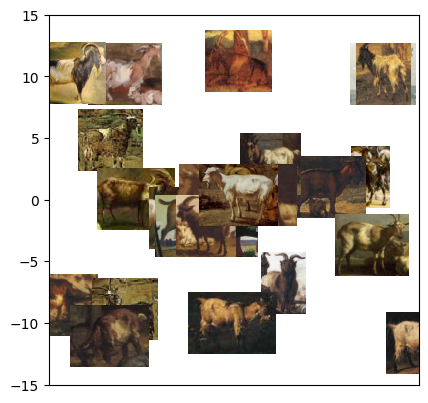

In [20]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Create scatterplot
fig, ax = plt.subplots()

# Read and plot images
for i, txt in enumerate(distMat.index[:-1]):
    # Read image
    image_path = os.path.join("/content/drive/MyDrive/UU_Thesis/IndivGoat2", f"{i + 1}.png")  # i + 1 because mahalScaled starts at 0
    img = plt.imread(image_path)

    # Get image dimensions
    img_height, img_width, _ = img.shape

    # Compute image aspect ratio
    aspect_ratio = img_width / img_height

    # Set the size of the image in pixels
    image_size_pixels = 5

    # Compute the extent of the image
    extent = [
        mahalScaled[:, 0][i] - aspect_ratio * image_size_pixels / 2,
        mahalScaled[:, 0][i] + aspect_ratio * image_size_pixels / 2,
        mahalScaled[:, 1][i] - image_size_pixels / 2,
        mahalScaled[:, 1][i] + image_size_pixels / 2
    ]

    # Plot the image
    ax.imshow(img, extent=extent)

# Set plot limits
ax.set_xlim([-15, 15])
ax.set_ylim([-15, 15])

# Save the scatter plot as an image file
plt.savefig('/content/drive/MyDrive/UU_Thesis/MDS15_plot.png')

# Remove scatter points and labels
ax.set_xticks([])
ax
